In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns




In [2]:
# Load the uploaded dataset
file_path = './MPS Ward Level Crime.csv'
crime_data = pd.read_csv(file_path)

# Display the first few rows and basic information about the dataset
crime_data.head(), crime_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1896 entries, 0 to 1895
Data columns (total 44 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   WardName            1896 non-null   object 
 1   WardCode            1896 non-null   object 
 2   LookUp_BoroughName  1896 non-null   object 
 3   population          1465 non-null   float64
 4   201901              1896 non-null   int64  
 5   201902              1896 non-null   int64  
 6   201903              1896 non-null   int64  
 7   201904              1896 non-null   int64  
 8   201905              1896 non-null   int64  
 9   201906              1896 non-null   int64  
 10  201907              1896 non-null   int64  
 11  201908              1896 non-null   int64  
 12  201909              1896 non-null   int64  
 13  201910              1896 non-null   int64  
 14  201911              1896 non-null   int64  
 15  201912              1896 non-null   int64  
 16  202001

(  WardName   WardCode    LookUp_BoroughName  population  201901  201902  \
 0    Abbey  E05014053  Barking and Dagenham     13002.0       0       0   
 1    Abbey  E05014053  Barking and Dagenham     13002.0       9       7   
 2    Abbey  E05014053  Barking and Dagenham     13002.0      16      21   
 3    Abbey  E05013810                Merton     10443.0       6       2   
 4    Abbey  E05013810                Merton     10443.0      13       8   
 
    201903  201904  201905  201906  ...  202107  202108  202109  202110  \
 0       0       0       0       0  ...       0       0       0       0   
 1       5       5       8       7  ...      16       4      13      13   
 2       8      11      21      12  ...      24      16      24      14   
 3      11       2       7       7  ...       6       7       7       6   
 4      14      14       9      10  ...      17      15      16      14   
 
    202111  202112  202201  202202  202203  202204  
 0       0       0       0       0   

In [3]:

ward_crime_totals = crime_data.iloc[:, 4:].sum(axis=1)
crime_data['TotalCrimes'] = ward_crime_totals

# Group by ward and summarize
ward_summary = crime_data.groupby(['WardName', 'LookUp_BoroughName'])['TotalCrimes'].sum().reset_index()

# Top 5 wards with the highest and lowest crime counts
top_wards = ward_summary.nlargest(5, 'TotalCrimes')
bottom_wards = ward_summary.nsmallest(5, 'TotalCrimes')

top_wards, bottom_wards

(                     WardName LookUp_BoroughName  TotalCrimes
 540                St James's        Westminster         7709
 638                  West End        Westminster         6181
 195                 Fairfield            Croydon         4034
 561               Stonebridge              Brent         2757
 261  Harlesden & Kensal Green              Brent         2590,
                  WardName        LookUp_BoroughName  TotalCrimes
 277     Heathrow Villages  Aviation Security (SO18)            3
 40             Berrylands      Kingston upon Thames          188
 676  Worcester Park South                    Sutton          189
 433  Park Hill & Whitgift                   Croydon          200
 598                 Tudor      Kingston upon Thames          227)

In [4]:
import pandas as pd

crime_stats = crime_data.groupby('WardName')['TotalCrimes'].agg(
    mean='mean',          # 均值
    variance='var',       # 方差
    std_dev='std',        # 标准差
    min='min',            # 最小值
    max='max',            # 最大值
    count='count'         # 计数
).reset_index()


print(crime_stats.head())


          WardName        mean       variance     std_dev  min   max  count
0            Abbey  339.000000   54146.500000  232.694005    1   593      5
1       Abbey Road  170.000000   35701.000000  188.947083    1   374      3
2       Abbey Wood  604.000000  381937.000000  618.010518    1  1236      3
3         Abingdon  229.333333   62664.333333  250.328451    1   497      3
4  Addiscombe East  284.666667   79532.333333  282.014775    1   565      3


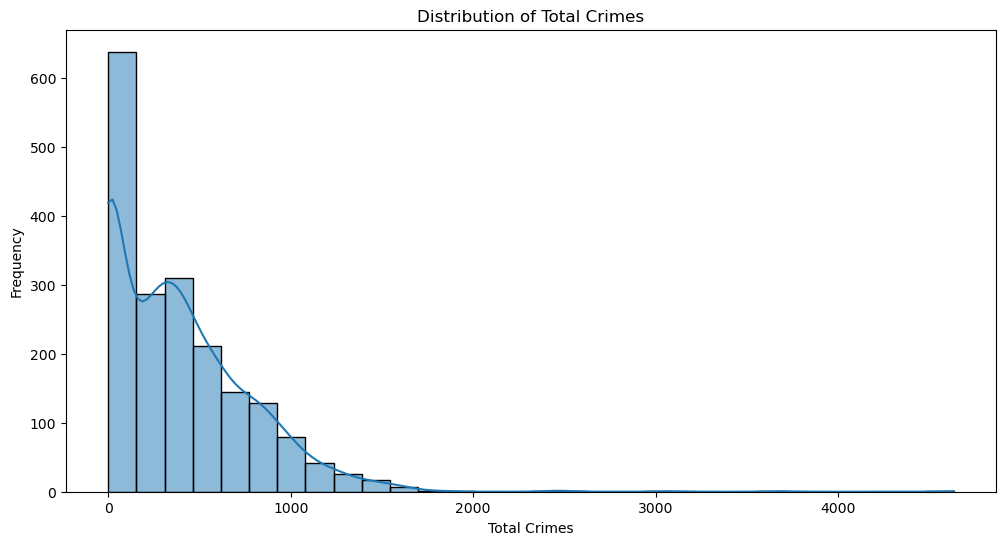

In [5]:
plt.figure(figsize=(12, 6))
sns.histplot(crime_data['TotalCrimes'], kde=True, bins=30)
plt.title('Distribution of Total Crimes')
plt.xlabel('Total Crimes')
plt.ylabel('Frequency')
file_path = '/home/jovyan/work/Desktop/QM/personal research/Distribution of Total Crimes.png'
plt.savefig(file_path)


plt.show()

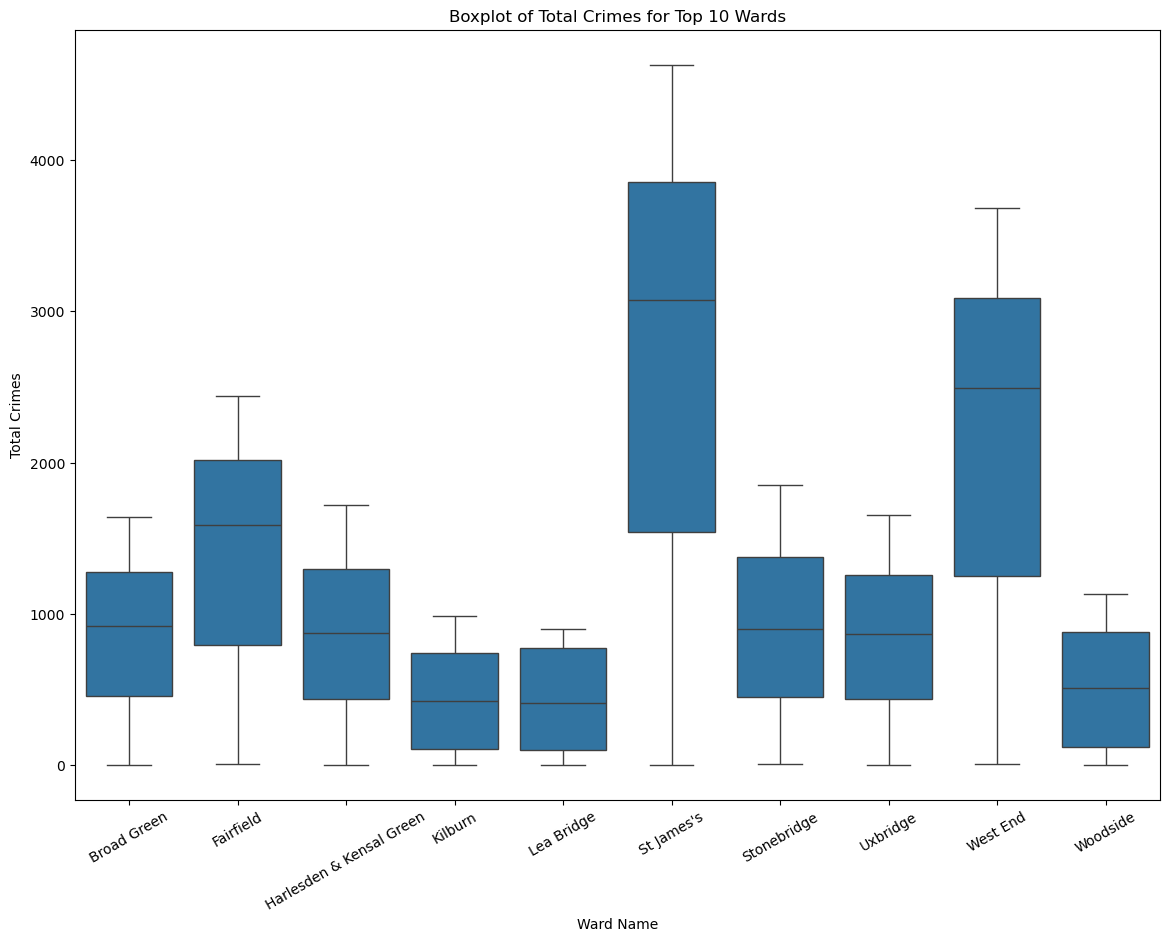

In [6]:
top_10_wards = crime_data.groupby('WardName')['TotalCrimes'].sum().sort_values(ascending=False).head(10).index

top_10_crime_data = crime_data[crime_data['WardName'].isin(top_10_wards)]

plt.figure(figsize=(14, 10))  
sns.boxplot(x='WardName', y='TotalCrimes', data=top_10_crime_data)
plt.xticks(rotation=30)
plt.title('Boxplot of Total Crimes for Top 10 Wards')
plt.xlabel('Ward Name')
plt.ylabel('Total Crimes')
file_path = '/home/jovyan/work/Desktop/QM/personal research/Boxplot of Total Crimes for Top 10 Wards.png'
plt.savefig(file_path)


plt.show()


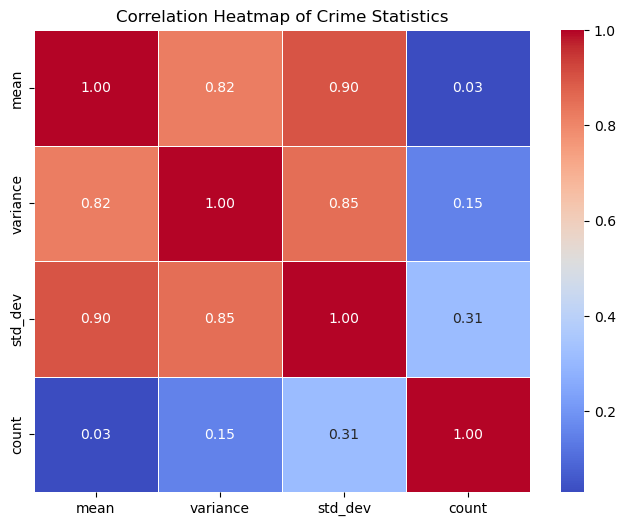

In [7]:

corr_matrix = crime_stats[['mean', 'variance', 'std_dev', 'count']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Crime Statistics')
file_path = '/home/jovyan/work/Desktop/QM/personal research/Correlation Heatmap of Crime Statistics.png'
plt.savefig(file_path)


plt.show()


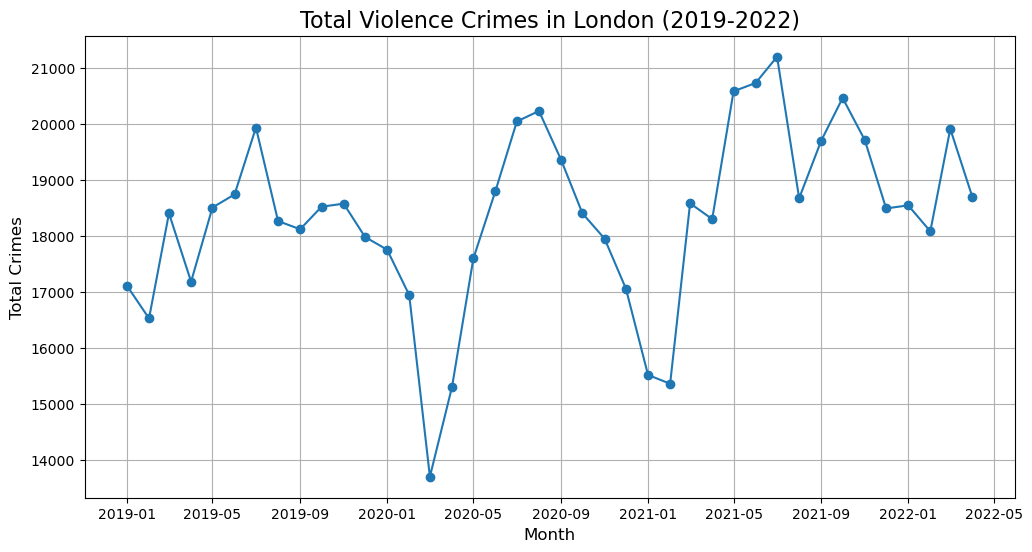

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

time_series_data = crime_data.iloc[:, 4:-1].sum().reset_index()  # 跳过前 4 列，计算每月总犯罪量
time_series_data.columns = ['Month', 'TotalCrimes']  # 重命名列
time_series_data['Month'] = pd.to_datetime(time_series_data['Month'], format='%Y%m')  # 转换为日期格式

plt.figure(figsize=(12, 6))
plt.plot(time_series_data['Month'], time_series_data['TotalCrimes'], marker='o', linestyle='-')
plt.title('Total Violence Crimes in London (2019-2022)', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Crimes', fontsize=12)
plt.grid(True)

file_path = '/home/jovyan/work/Desktop/QM/personal research/Total Violence Crimes in London (2019-2022).png'
plt.savefig(file_path)


plt.show()


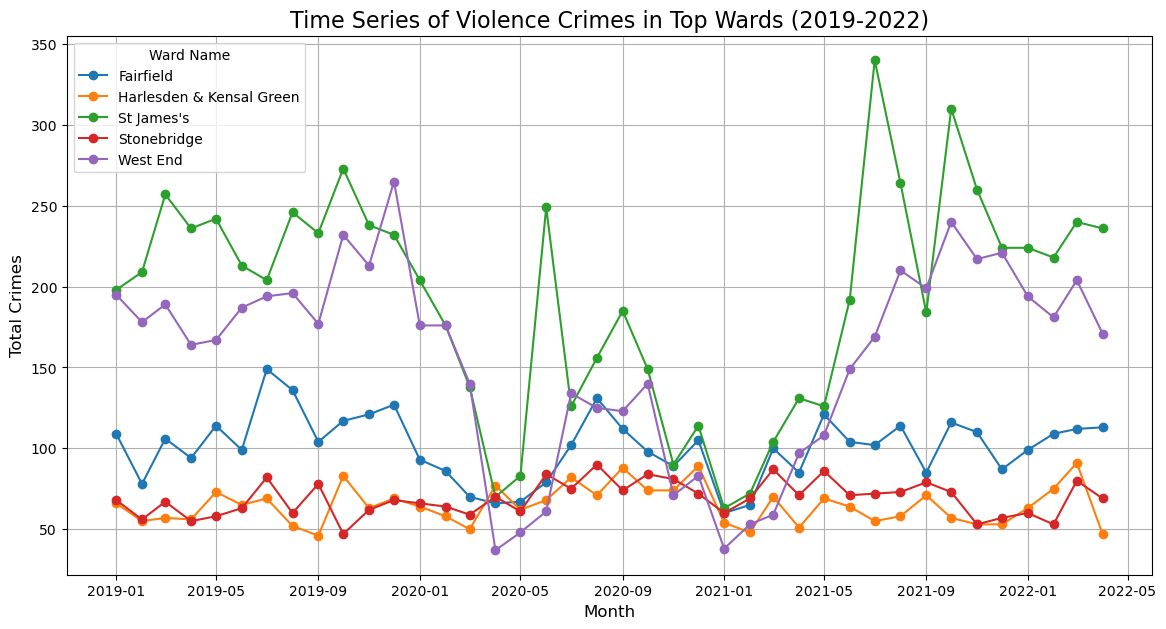

In [9]:

top_wards_names = top_wards['WardName'].tolist()
top_wards_data = crime_data[crime_data['WardName'].isin(top_wards_names)]

top_wards_time_series = top_wards_data.groupby('WardName').sum().iloc[:, 3:-1].T
top_wards_time_series.index = pd.to_datetime(top_wards_time_series.index, format='%Y%m')


plt.figure(figsize=(14, 7))
for ward in top_wards_time_series.columns:
    plt.plot(top_wards_time_series.index, top_wards_time_series[ward], label=ward, marker='o')

plt.title('Time Series of Violence Crimes in Top Wards (2019-2022)', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Crimes', fontsize=12)
plt.legend(title="Ward Name", fontsize=10)
plt.grid(True)

file_path = '/home/jovyan/work/Desktop/QM/personal research/Time Series of Violence Crimes in Top Wards (2019-2022).png'
plt.savefig(file_path)


plt.show()


In [10]:

crime_2019 = crime_data.loc[:, '201901':'201912'].sum(axis=1)
crime_2020 = crime_data.loc[:, '202001':'202012'].sum(axis=1)
crime_2021 = crime_data.loc[:, '202101':'202112'].sum(axis=1)
crime_2022 = crime_data.loc[:, '202201':'202204'].sum(axis=1)

crime_data['Crimes_2019'] = crime_2019
crime_data['Crimes_2020'] = crime_2020
crime_data['Crimes_2021'] = crime_2021
crime_data['Crimes_2022'] = crime_2022

total_2019 = crime_2019.sum()
total_2020 = crime_2020.sum()
total_2021 = crime_2021.sum()
change_percentage = (total_2020 - total_2019) / total_2019 * 100


ward_changes = crime_data.groupby('WardName')[['Crimes_2019', 'Crimes_2020', 'Crimes_2021', 'Crimes_2022']].sum()
ward_changes['Change'] = ward_changes['Crimes_2021'] - ward_changes['Crimes_2019']


print(f"2019年总犯罪量: {total_2019}")
print(f"2020年总犯罪量: {total_2020}")
print(f"2021年总犯罪量: {total_2021}")

print(f"2019-2021变化百分比: {change_percentage:.2f}%")
print(ward_changes.sort_values(by='Change', ascending=False).head())


2019年总犯罪量: 217883
2020年总犯罪量: 213164
2021年总犯罪量: 227320
2019-2021变化百分比: -2.17%
                     Crimes_2019  Crimes_2020  Crimes_2021  Crimes_2022  \
WardName                                                                  
Burnt Oak                    495          518          699          193   
Wandsworth Common            460          589          631          160   
West Thornton                605          754          769          257   
Enfield Lock                 402          549          562          171   
Northumberland Park          577          691          732          219   

                     Change  
WardName                     
Burnt Oak               204  
Wandsworth Common       171  
West Thornton           164  
Enfield Lock            160  
Northumberland Park     155  


In [11]:
import geopandas as gpd


shapefile_path = './London_Ward.shp'  
ward_geodata = gpd.read_file(shapefile_path)

print(ward_geodata.head())


                     NAME   GSS_CODE              DISTRICT  LAGSSCODE  \
0       Chessington South  E05000405  Kingston upon Thames  E09000021   
1  Tolworth and Hook Rise  E05000414  Kingston upon Thames  E09000021   
2              Berrylands  E05000401  Kingston upon Thames  E09000021   
3               Alexandra  E05000400  Kingston upon Thames  E09000021   
4                Beverley  E05000402  Kingston upon Thames  E09000021   

   HECTARES  NONLD_AREA                                           geometry  
0   755.173         0.0  POLYGON ((516401.596 160201.802, 516407.302 16...  
1   259.464         0.0  POLYGON ((519552.998 164295.6, 519508.096 1643...  
2   145.390         0.0  POLYGON ((518107.499 167303.399, 518114.301 16...  
3   268.506         0.0  POLYGON ((520336.7 165105.498, 520332.198 1651...  
4   187.821         0.0  POLYGON ((521201.203 169275.505, 521204.303 16...  


In [12]:

print(crime_data.columns)

print(ward_geodata.columns)

Index(['WardName', 'WardCode', 'LookUp_BoroughName', 'population', '201901',
       '201902', '201903', '201904', '201905', '201906', '201907', '201908',
       '201909', '201910', '201911', '201912', '202001', '202002', '202003',
       '202004', '202005', '202006', '202007', '202008', '202009', '202010',
       '202011', '202012', '202101', '202102', '202103', '202104', '202105',
       '202106', '202107', '202108', '202109', '202110', '202111', '202112',
       '202201', '202202', '202203', '202204', 'TotalCrimes', 'Crimes_2019',
       'Crimes_2020', 'Crimes_2021', 'Crimes_2022'],
      dtype='object')
Index(['NAME', 'GSS_CODE', 'DISTRICT', 'LAGSSCODE', 'HECTARES', 'NONLD_AREA',
       'geometry'],
      dtype='object')


In [13]:

ward_geodata['NAME'] = ward_geodata['NAME'].str.strip().str.lower()
crime_data['WardName'] = crime_data['WardName'].str.strip().str.lower()


In [14]:
!pip install fuzzywuzzy
from fuzzywuzzy import process


crime_ward_names = crime_data['WardName'].unique()


/opt/conda/lib/python3.11/site-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [15]:

matching_dict = {
    ward: process.extractOne(ward, crime_ward_names)[0] for ward in ward_geodata['NAME']
}


ward_geodata['NAME'] = ward_geodata['NAME'].map(matching_dict).fillna(ward_geodata['NAME'])

print(ward_geodata[['NAME']].head())


                                 NAME
0  chessington south & malden rushett
1                            tolworth
2                          berrylands
3                           alexandra
4                           belvedere


In [16]:
ward_geodata['NAME'] = ward_geodata['NAME'].apply(lambda x: matching_dict.get(x, x))


print(ward_geodata[['NAME']].head())


                                 NAME
0  chessington south & malden rushett
1                            tolworth
2                          berrylands
3                           alexandra
4                           belvedere


In [17]:

merged_data = ward_geodata.merge(crime_data, how='left', left_on='NAME', right_on='WardName')

print(merged_data.head())


                                 NAME   GSS_CODE              DISTRICT  \
0  chessington south & malden rushett  E05000405  Kingston upon Thames   
1  chessington south & malden rushett  E05000405  Kingston upon Thames   
2  chessington south & malden rushett  E05000405  Kingston upon Thames   
3                            tolworth  E05000414  Kingston upon Thames   
4                            tolworth  E05000414  Kingston upon Thames   

   LAGSSCODE  HECTARES  NONLD_AREA  \
0  E09000021   755.173         0.0   
1  E09000021   755.173         0.0   
2  E09000021   755.173         0.0   
3  E09000021   259.464         0.0   
4  E09000021   259.464         0.0   

                                            geometry  \
0  POLYGON ((516401.596 160201.802, 516407.302 16...   
1  POLYGON ((516401.596 160201.802, 516407.302 16...   
2  POLYGON ((516401.596 160201.802, 516407.302 16...   
3  POLYGON ((519552.998 164295.6, 519508.096 1643...   
4  POLYGON ((519552.998 164295.6, 519508.096 1

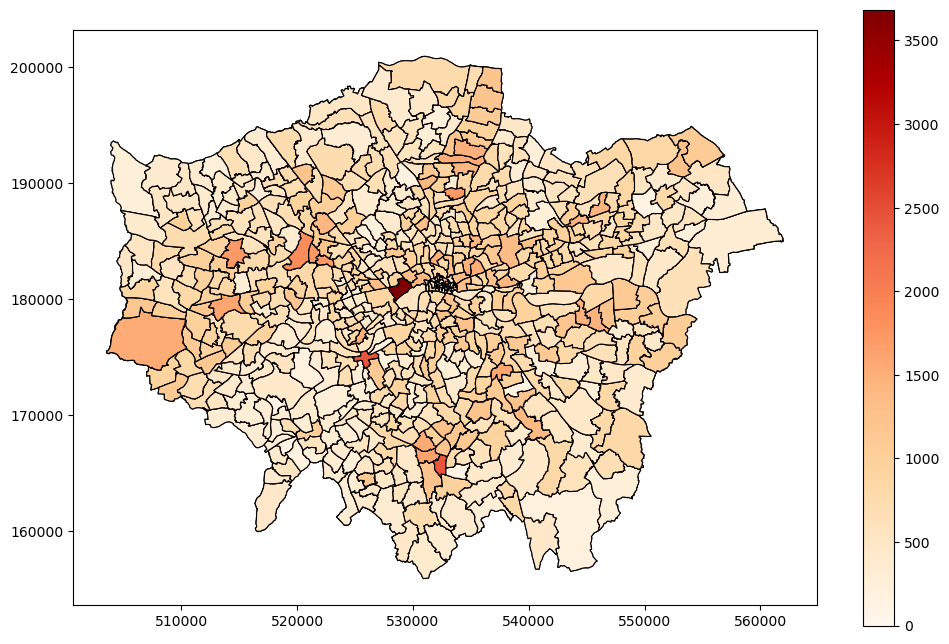

In [18]:
import matplotlib.pyplot as plt


fig, ax = plt.subplots(1, 1, figsize=(12, 8))
merged_data.plot(column='TotalCrimes', cmap='OrRd', linewidth=0.8, edgecolor='black', ax=ax, legend=True)


file_path = '/home/jovyan/work/Desktop/QM/personal research/Crime Distribution by Ward.png'
plt.savefig(file_path)


plt.show()

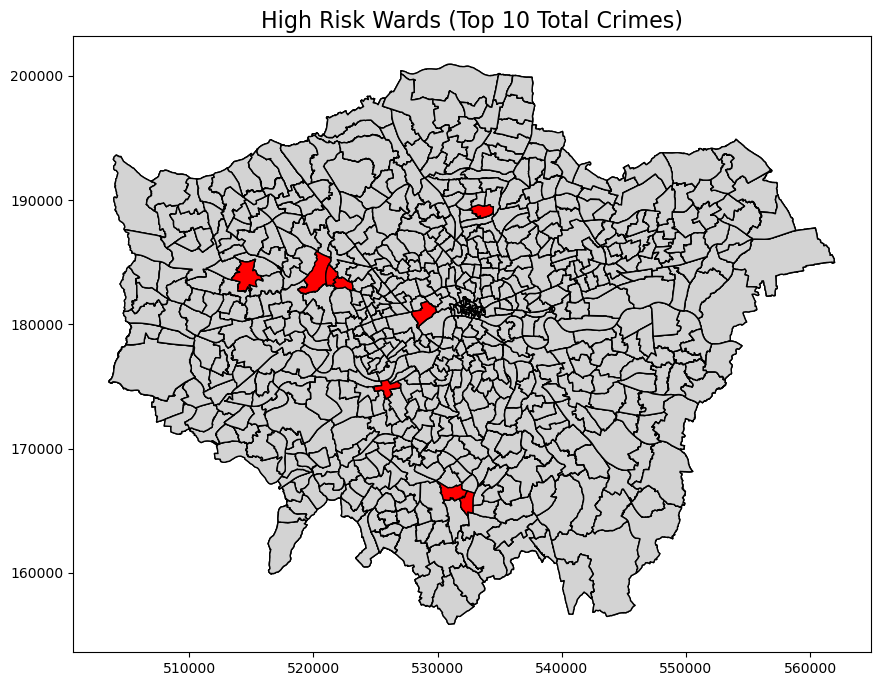

In [19]:
high_risk_wards = merged_data.nlargest(10, 'TotalCrimes')

fig, ax = plt.subplots(1, 1, figsize=(12, 8))
merged_data.plot(ax=ax, color='lightgray', edgecolor='black')

high_risk_wards.plot(ax=ax, color='red', edgecolor='black')

plt.title('High Risk Wards (Top 10 Total Crimes)', fontsize=16)
file_path = '/home/jovyan/work/Desktop/QM/personal research/high risk wards.png'
plt.savefig(file_path)


plt.show()



In [20]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt

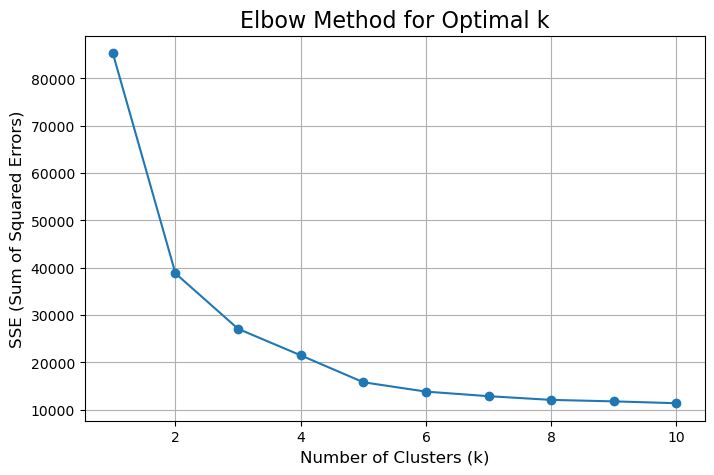

In [21]:

numeric_data = crime_data.drop(columns=['population']).select_dtypes(include=['float64', 'int64'])


scaler = StandardScaler()
X_scaled = scaler.fit_transform(numeric_data)


sse = []  
for k in range(1, 11): 
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)


plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of Clusters (k)', fontsize=12)
plt.ylabel('SSE (Sum of Squared Errors)', fontsize=12)
plt.title('Elbow Method for Optimal k', fontsize=16)
plt.grid(True)

file_path = '/home/jovyan/work/Desktop/QM/personal research/elbow method for k.png'
plt.savefig(file_path)


plt.show()


In [22]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)

crime_data['Cluster'] = kmeans.labels_
numeric_columns = crime_data.select_dtypes(include=['float64', 'int64']).columns
cluster_summary = crime_data.groupby('Cluster')[numeric_columns].mean()
print(cluster_summary)

           population     201901     201902     201903     201904     201905  \
Cluster                                                                        
0        12659.027994   1.553166   1.511350   1.814815   1.688172   1.762246   
1        14215.858268  23.717868  23.009404  25.758621  23.203762  25.156740   
2        12948.183099  11.145946  10.708108  11.713514  11.310811  12.172973   

            201906     201907     201908     201909  ...     202112  \
Cluster                                              ...              
0         1.798088   1.802867   1.726404   1.682198  ...   1.639188   
1        25.410658  27.727273  25.034483  25.598746  ...  26.583072   
2        12.337838  12.945946  11.939189  11.548649  ...  11.675676   

            202201     202202     202203     202204  TotalCrimes  Crimes_2019  \
Cluster                                                                         
0         1.599761   1.538829   1.681004   1.623656    65.741935    20.295102   


In [23]:
ward_geodata = ward_geodata.set_index('NAME') 
crime_data = crime_data.set_index('WardName')

ward_geodata = ward_geodata.join(crime_data['Cluster'])


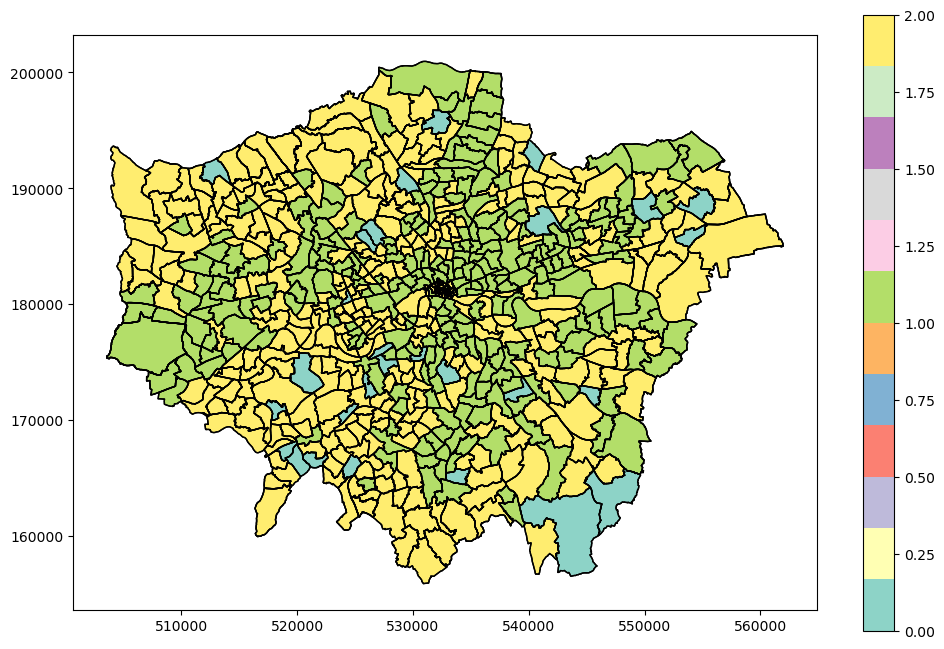

In [43]:
import matplotlib.pyplot as plt
import geopandas as gpd

fig, ax = plt.subplots(1, 1, figsize=(12, 8))

ward_geodata.plot(column='Cluster', cmap='Set3', ax=ax, legend=True)

ward_geodata.boundary.plot(ax=ax, linewidth=1, color="black")


file_path = '/home/jovyan/work/Desktop/QM/personal research/Ward Clusters Based on Crime Data.png'
plt.savefig(file_path)


plt.show()



In [25]:
crime_data_long = crime_data.melt(
    id_vars=['WardCode', 'LookUp_BoroughName', 'population', 'TotalCrimes'],
    value_vars=[col for col in crime_data.columns if col.isdigit()],
    var_name='Month',
    value_name='CrimeCount'
)

crime_data_long['Month'] = pd.to_datetime(crime_data_long['Month'], format='%Y%m')

print(crime_data_long.head())



    WardCode    LookUp_BoroughName  population  TotalCrimes      Month  \
0  E05014053  Barking and Dagenham     13002.0            1 2019-01-01   
1  E05014053  Barking and Dagenham     13002.0          359 2019-01-01   
2  E05014053  Barking and Dagenham     13002.0          593 2019-01-01   
3  E05013810                Merton     10443.0          238 2019-01-01   
4  E05013810                Merton     10443.0          504 2019-01-01   

   CrimeCount  
0           0  
1           9  
2          16  
3           6  
4          13  


In [26]:

time_series_data['Year'] = time_series_data['Month'].dt.year
time_series_data['Month_Num'] = time_series_data['Month'].dt.month

time_series_data['TimeStep'] = (time_series_data['Month'] - time_series_data['Month'].min()).dt.days


In [27]:
from sklearn.linear_model import LinearRegression
import numpy as np

X = time_series_data[['TimeStep']]  
y = time_series_data['TotalCrimes']  

model = LinearRegression()
model.fit(X, y)


coef = model.coef_[0]  # 斜率
intercept = model.intercept_  # 截距

print(f"线性回归方程: TotalCrimes = {coef:.2f} * TimeStep + {intercept:.2f}")


线性回归方程: TotalCrimes = 1.50 * TimeStep + 17450.49


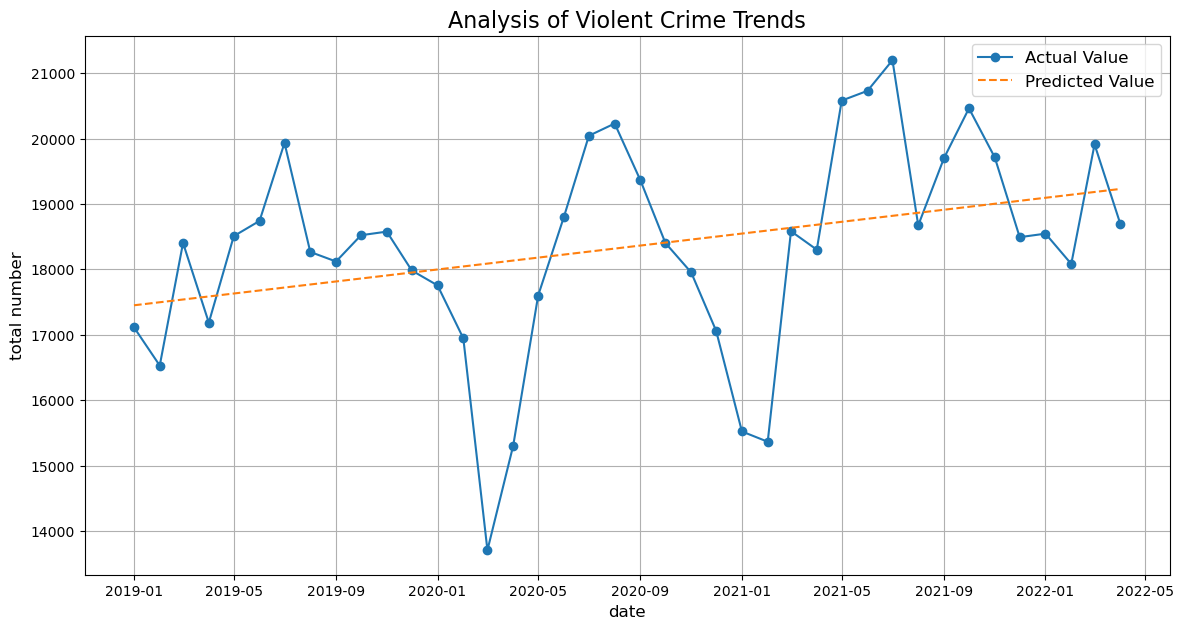

In [28]:
time_series_data['PredictedCrimes'] = model.predict(X)

import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))
plt.plot(time_series_data['Month'], time_series_data['TotalCrimes'], label='Actual Value', marker='o')
plt.plot(time_series_data['Month'], time_series_data['PredictedCrimes'], label='Predicted Value', linestyle='--')

plt.title('Analysis of Violent Crime Trends', fontsize=16)
plt.xlabel('date', fontsize=12)
plt.ylabel('total number', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)

file_path = '/home/jovyan/work/Desktop/QM/personal research/Analysis of Violent Crime Trends.png'
plt.savefig(file_path)


plt.show()


In [29]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y, time_series_data['PredictedCrimes'])
r2 = r2_score(y, time_series_data['PredictedCrimes'])

print(f"均方误差 (MSE): {mse:.2f}")
print(f"决定系数 (R^2): {r2:.2f}")


均方误差 (MSE): 2197295.55
决定系数 (R^2): 0.11


In [30]:
print(crime_data.head())

           WardCode    LookUp_BoroughName  population  201901  201902  201903  \
WardName                                                                        
abbey     E05014053  Barking and Dagenham     13002.0       0       0       0   
abbey     E05014053  Barking and Dagenham     13002.0       9       7       5   
abbey     E05014053  Barking and Dagenham     13002.0      16      21       8   
abbey     E05013810                Merton     10443.0       6       2      11   
abbey     E05013810                Merton     10443.0      13       8      14   

          201904  201905  201906  201907  ...  202201  202202  202203  202204  \
WardName                                  ...                                   
abbey          0       0       0       0  ...       0       0       1       0   
abbey          5       8       7      11  ...       8       4      10      10   
abbey         11      21      12      18  ...      14      15      14      13   
abbey          2       7   

In [31]:
time_series_data['Year'] = time_series_data['Month'].dt.year
time_series_data['Month_Num'] = time_series_data['Month'].dt.month

time_series_data['TimeStep'] = (time_series_data['Month'] - time_series_data['Month'].min()).dt.days


In [32]:

print(time_series_data.head())
print(crime_data.head())

       Month  TotalCrimes  Year  Month_Num  TimeStep  PredictedCrimes
0 2019-01-01        17114  2019          1         0     17450.487016
1 2019-02-01        16529  2019          2        31     17496.990308
2 2019-03-01        18404  2019          3        59     17538.993282
3 2019-04-01        17185  2019          4        90     17585.496575
4 2019-05-01        18508  2019          5       120     17630.499761
           WardCode    LookUp_BoroughName  population  201901  201902  201903  \
WardName                                                                        
abbey     E05014053  Barking and Dagenham     13002.0       0       0       0   
abbey     E05014053  Barking and Dagenham     13002.0       9       7       5   
abbey     E05014053  Barking and Dagenham     13002.0      16      21       8   
abbey     E05013810                Merton     10443.0       6       2      11   
abbey     E05013810                Merton     10443.0      13       8      14   

          20

In [33]:
crime_data_long = crime_data.melt(
    id_vars=['WardCode', 'LookUp_BoroughName', 'population', 'TotalCrimes'],
    value_vars=[col for col in crime_data.columns if col.isdigit()],
    var_name='Month',
    value_name='CrimeCount'
)

crime_data_long['Month'] = pd.to_datetime(crime_data_long['Month'], format='%Y%m')

print(crime_data_long.head())


    WardCode    LookUp_BoroughName  population  TotalCrimes      Month  \
0  E05014053  Barking and Dagenham     13002.0            1 2019-01-01   
1  E05014053  Barking and Dagenham     13002.0          359 2019-01-01   
2  E05014053  Barking and Dagenham     13002.0          593 2019-01-01   
3  E05013810                Merton     10443.0          238 2019-01-01   
4  E05013810                Merton     10443.0          504 2019-01-01   

   CrimeCount  
0           0  
1           9  
2          16  
3           6  
4          13  


In [34]:
crime_data_long = crime_data.melt(
    id_vars=['WardCode', 'LookUp_BoroughName', 'population', 'TotalCrimes'],
    value_vars=[col for col in crime_data.columns if col.isdigit()],
    var_name='Month',
    value_name='CrimeCount'
)

crime_data_long['Month'] = pd.to_datetime(crime_data_long['Month'], format='%Y%m')
print(crime_data_long.head())


    WardCode    LookUp_BoroughName  population  TotalCrimes      Month  \
0  E05014053  Barking and Dagenham     13002.0            1 2019-01-01   
1  E05014053  Barking and Dagenham     13002.0          359 2019-01-01   
2  E05014053  Barking and Dagenham     13002.0          593 2019-01-01   
3  E05013810                Merton     10443.0          238 2019-01-01   
4  E05013810                Merton     10443.0          504 2019-01-01   

   CrimeCount  
0           0  
1           9  
2          16  
3           6  
4          13  


In [35]:
merged_data = pd.merge(
    time_series_data,
    crime_data_long[['Month', 'population']],
    on='Month',
    how='left'
)
merged_data = merged_data.drop_duplicates()
print(merged_data.head())

        Month  TotalCrimes  Year  Month_Num  TimeStep  PredictedCrimes  \
0  2019-01-01        17114  2019          1         0     17450.487016   
3  2019-01-01        17114  2019          1         0     17450.487016   
5  2019-01-01        17114  2019          1         0     17450.487016   
8  2019-01-01        17114  2019          1         0     17450.487016   
11 2019-01-01        17114  2019          1         0     17450.487016   

    population  
0      13002.0  
3      10443.0  
5      11263.0  
8      15757.0  
11     10008.0  


In [36]:
merged_data = merged_data.dropna(subset=['TimeStep', 'population', 'TotalCrimes'])



In [37]:
import numpy as np

merged_data['log_TotalCrimes'] = np.log(merged_data['TotalCrimes'] + 1)

print(merged_data[['TotalCrimes', 'log_TotalCrimes']].head())


    TotalCrimes  log_TotalCrimes
0         17114         9.747711
3         17114         9.747711
5         17114         9.747711
8         17114         9.747711
11        17114         9.747711


In [38]:
merged_data['log_population'] = np.log(merged_data['population'] + 1)

print(merged_data[['population', 'log_population']].head())


    population  log_population
0      13002.0        9.472935
3      10443.0        9.253783
5      11263.0        9.329367
8      15757.0        9.665103
11     10008.0        9.211240


In [39]:

X = merged_data[['TimeStep', 'population']]  # 自变量
y = merged_data['TotalCrimes']  # 因变量


In [40]:
import statsmodels.api as sm


X = sm.add_constant(X)


In [41]:

model = sm.OLS(y, X).fit()

print(model.summary())


                            OLS Regression Results                            
Dep. Variable:            TotalCrimes   R-squared:                       0.112
Model:                            OLS   Adj. R-squared:                  0.112
Method:                 Least Squares   F-statistic:                     1245.
Date:                Thu, 02 Jan 2025   Prob (F-statistic):               0.00
Time:                        17:50:15   Log-Likelihood:            -1.7162e+05
No. Observations:               19680   AIC:                         3.432e+05
Df Residuals:                   19677   BIC:                         3.433e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.745e+04     51.737    337.292      0.0